<h1>Avocado Price Kaggle Data Set</h1>

<h2>I. Data Wrangling</h2>

In [227]:
# Import neccessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

# Cause plots to be displayed in the notebook:
%pylab inline
%matplotlib inline

sns.set(color_codes = True)
pd.set_option('display.max_rows', 50)

Populating the interactive namespace from numpy and matplotlib


/opt/anaconda3/envs/py38_for_data/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['datetime']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [228]:
# Check version
print('Numpy: ', np.__version__)
print('Pandas: ', pd.__version__)

Numpy:  1.19.2
Pandas:  1.1.5


In [229]:
avo = pd.read_csv('../../data/avocado.csv') # read data
avo.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

<h2>II. Data Munging</h2>

In [178]:
avo.head()

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22   794.70  109149.67   
3           3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4           4  2015-11-29          1.28      51039.60   941.48   43838.39   

     4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0   48.16     8696.87     8603.62       93.25          0.0  conventional   
1   58.33     9505.56     9408.07       97.49          0.0  conventional   
2  130.50     8145.35     8042.21      103.14          0.0  conventional   
3   72.58     5811.16     5677.40      133.76          0.0  conventional   
4   75.78     6183.95     5986.26      197.69          0.0  conventional   

   year  region  
0  2015  Albany  
1  2015  Albany  
2  2015  Albany  
3  2015  Albany  
4  2015  Albany

In [179]:
avo.describe().T # inspect statictics of the data

count           mean           std      min       25%  \
Unnamed: 0    18249.0      24.232232  1.548104e+01     0.00     10.00   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.10   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.58   
4046          18249.0  293008.424531  1.264989e+06     0.00    854.07   
4225          18249.0  295154.568356  1.204120e+06     0.00   3008.78   
4770          18249.0   22839.735993  1.074641e+05     0.00      0.00   
Total Bags    18249.0  239639.202060  9.862424e+05     0.00   5088.64   
Small Bags    18249.0  182194.686696  7.461785e+05     0.00   2849.42   
Large Bags    18249.0   54338.088145  2.439660e+05     0.00    127.47   
XLarge Bags   18249.0    3106.426507  1.769289e+04     0.00      0.00   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.00   

                    50%        75%          max  
Unnamed: 0        24.00      38.00        52.00  
AveragePrice       1.37       1.66         3.25  
Total Volume  107376.76  432962.29  62505646.52  
4046            8645.30  111020.20  22743616.17  
4225           29061.02  150206.86  20470572.61  
4770             184.99    6243.42   2546439.11  
Total Bags     39743.83  110783.37  19373134.37  
Small Bags     26362.82   83337.67  13384586.80  
Large Bags      2647.71   22029.25   5719096.61  
XLarge Bags        0.00     132.50    551693.65  
year            2016.00    2017.00      2018.00

In [180]:
# Check dat types
avo.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [226]:
# Unnamed:0 column is dupicate with index - drop it
try:
    avo.drop('Unnamed: 0', axis=1, inplace=True)
except:
    print(f"Columned Unnamed:0 has been removed")
avo

Columned Unnamed:0 has been removed


Date  AveragePrice  Total Volume     4046       4225    4770  \
0      2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1      2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2      2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3      2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4      2015-11-29          1.28      51039.60   941.48   43838.39   75.78   
...           ...           ...           ...      ...        ...     ...   
18244  2018-02-04          1.63      17074.83  2046.96    1529.20    0.00   
18245  2018-01-28          1.71      13888.04  1191.70    3431.50    0.00   
18246  2018-01-21          1.87      13766.76  1191.92    2452.79  727.94   
18247  2018-01-14          1.93      16205.22  1527.63    2981.04  727.01   
18248  2018-01-07          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  \
0         8696.87     8603.62       93.25          0.0  conventional  2015   
1         9505.56     9408.07       97.49          0.0  conventional  2015   
2         8145.35     8042.21      103.14          0.0  conventional  2015   
3         5811.16     5677.40      133.76          0.0  conventional  2015   
4         6183.95     5986.26      197.69          0.0  conventional  2015   
...           ...         ...         ...          ...           ...   ...   
18244    13498.67    13066.82      431.85          0.0       organic  2018   
18245     9264.84     8940.04      324.80          0.0       organic  2018   
18246     9394.11     9351.80       42.31          0.0       organic  2018   
18247    10969.54    10919.54       50.00          0.0       organic  2018   
18248    12014.15    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 13 columns]

In [182]:
avo.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [183]:
row, col = avo.shape
print(f'avo has {row} rows and {col} columns')

avo has 18249 rows and 13 columns


In [205]:
# Quick inspect if there are any null values
avo.isnull().head()

Unnamed: 0   Date  AveragePrice  Total Volume   4046   4225   4770  \
0       False  False         False         False  False  False  False   
1       False  False         False         False  False  False  False   
2       False  False         False         False  False  False  False   
3       False  False         False         False  False  False  False   
4       False  False         False         False  False  False  False   

   Total Bags  Small Bags  Large Bags  XLarge Bags   type   year  region  
0       False       False       False        False  False  False   False  
1       False       False       False        False  False  False   False  
2       False       False       False        False  False  False   False  
3       False       False       False        False  False  False   False  
4       False       False       False        False  False  False   False

In [185]:
# Count null value in the dataframe
avo.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [186]:
# How many regions are there in the dataset
avo.groupby('region').count()

Date  AveragePrice  Total Volume  4046  4225  4770  \
region                                                                    
Albany                338           338           338   338   338   338   
Atlanta               338           338           338   338   338   338   
BaltimoreWashington   338           338           338   338   338   338   
Boise                 338           338           338   338   338   338   
Boston                338           338           338   338   338   338   
...                   ...           ...           ...   ...   ...   ...   
Syracuse              338           338           338   338   338   338   
Tampa                 338           338           338   338   338   338   
TotalUS               338           338           338   338   338   338   
West                  338           338           338   338   338   338   
WestTexNewMexico      335           335           335   335   335   335   

                     Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
region                                                                       
Albany                      338         338         338          338   338   
Atlanta                     338         338         338          338   338   
BaltimoreWashington         338         338         338          338   338   
Boise                       338         338         338          338   338   
Boston                      338         338         338          338   338   
...                         ...         ...         ...          ...   ...   
Syracuse                    338         338         338          338   338   
Tampa                       338         338         338          338   338   
TotalUS                     338         338         338          338   338   
West                        338         338         338          338   338   
WestTexNewMexico            335         335         335          335   335   

                     year  
region                     
Albany                338  
Atlanta               338  
BaltimoreWashington   338  
Boise                 338  
Boston                338  
...                   ...  
Syracuse              338  
Tampa                 338  
TotalUS               338  
West                  338  
WestTexNewMexico      335  

[54 rows x 12 columns]

In [187]:
# View unique region names
avo.region.unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [188]:
avo.head()

Date  AveragePrice  Total Volume     4046       4225    4770  \
0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [206]:
# Let's pick a state and do some plots
houston = avo[avo.region =='Houston'].sort_values('Date') 
houston.head()

Unnamed: 0        Date  AveragePrice  Total Volume       4046  \
987            51  2015-01-04          0.71    1062990.62  506426.58   
10113          51  2015-01-04          1.22       8938.32    7009.77   
986            50  2015-01-11          0.78    1062071.65  463272.52   
10112          50  2015-01-11          1.26       7561.00    6142.35   
985            49  2015-01-18          0.77    1017854.16  458532.19   

            4225     4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
987    436347.57  4378.92   115837.55    90299.85    25537.70          0.0   
10113     671.88     0.00     1256.67     1256.67        0.00          0.0   
986    441785.80  4094.47   152918.86   126995.76    25923.10          0.0   
10112     818.65     0.00      600.00      600.00        0.00          0.0   
985    429687.47  9353.74   120280.76   107320.39    12960.37          0.0   

               type  year   region  
987    conventional  2015  Houston  
10113       organic  2015  Houston  
986    conventional  2015  Houston  
10112       organic  2015  Houston  
985    conventional  2015  Houston

In [225]:
# Check Date Range
from datetime import datetime

start_date = datetime.strptime(houston.Date.min(), '%Y-%m-%d') 
end_date = datetime.strptime(houston.Date.max(), '%Y-%m-%d')
duration = int(str(end_date - start_date).replace(' days, 0:00:00', ''))

print(f"Date Range from {houston.Date.min()} to {houston.Date.max()} (~ {duration/365} years)")


Date Range from 2015-01-04 to 2018-03-25 (~ 3.221917808219178 years)


In [207]:
plt.figure(figsize=(10,12))
houston_date = pd.to_datetime(houston['Date']) # Convert date column into datetime

<Figure size 720x864 with 0 Axes>

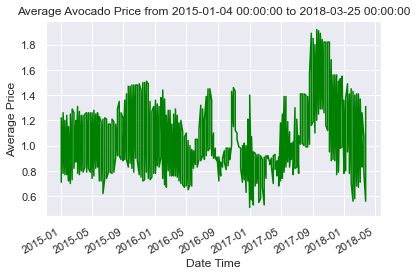

In [209]:
plt.plot(houston_date, houston['AveragePrice'], color='green')

plt.title(f"Average Avocado Price from {start_date} to {end_date}")
plt.xlabel('Date Time')
plt.ylabel('Average Price')
plt.gcf().autofmt_xdate()


(array([ 9.,  3., 39., 47., 44., 25., 27., 13., 24., 36., 15., 21., 17.,
         6.,  1.,  0.,  6.,  5.]),
 array([0.51      , 0.58833333, 0.66666667, 0.745     , 0.82333333,
        0.90166667, 0.98      , 1.05833333, 1.13666667, 1.215     ,
        1.29333333, 1.37166667, 1.45      , 1.52833333, 1.60666667,
        1.685     , 1.76333333, 1.84166667, 1.92      ]),
 <BarContainer object of 18 artists>)

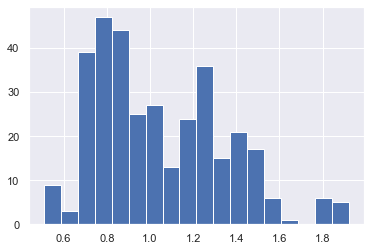

In [217]:
bins = int(np.sqrt(houston.shape[0])) # Rule of thumps bins = sqrt(no_sample)
plt.hist(houston['AveragePrice'], bins=bins)

{'whiskers': [<matplotlib.lines.Line2D at 0x12656f460>,
 'caps': [<matplotlib.lines.Line2D at 0x12656f8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1237ac0a0>],
 'medians': [<matplotlib.lines.Line2D at 0x12656f0a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x12659a340>],
 'means': []}

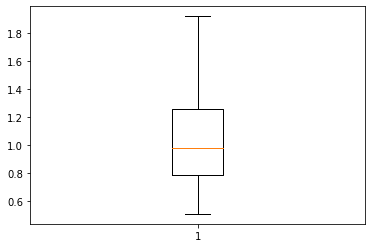

In [170]:
plt.boxplot(houston['AveragePrice'])

<h2>Pandas Profiling</h2>

In [200]:
houston.profile_report()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<h2>Reference</h2>
https://www.kaggle.com/neuromusic/avocado-prices